# 1. Load and Prepare the Data

In [6]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd

data = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# 2. EDA

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# 3. Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
target = "MedHouseVal"
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Build Preprocessing pipeline
 - Only scaling needed for this data

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Create a preprocessor
num_features = list(X.select_dtypes("number").columns)
scaler = StandardScaler()
num_transformer = make_pipeline(scaler)

preprocessor = make_column_transformer((num_transformer, num_features))

# 5. Model Selection

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

predicters = {
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    GradientBoostingRegressor()
}

In [13]:
"""
from sklearn.model_selection import GridSearchCV

for predicter in  predicters:
    pipe = make_pipeline(preprocessor, predicter)
    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="r2", n_jobs=-1)
    grid.fit(X_train, y_train)

    print(f"Train score for {predicter}: {grid.best_score_}")
    """

'\nfrom sklearn.model_selection import GridSearchCV\n\nfor predicter in  predicters:\n    pipe = make_pipeline(preprocessor, predicter)\n    grid = GridSearchCV(estimator=pipe, param_grid={}, cv=5, scoring="r2", n_jobs=-1)\n    grid.fit(X_train, y_train)\n\n    print(f"Train score for {predicter}: {grid.best_score_}")\n    '

Top 2 Models
 - RandomForestRegressor
 - GradientBoostingRegressor

Train score for Lasso(): -0.00031742988315350826

Train score for GradientBoostingRegressor(): 0.7866460188291511

Train score for DecisionTreeRegressor(): 0.6014886235670153

Train score for LinearRegression(): 0.6114839952560993

Train score for Ridge(): 0.6114836031990163

Train score for SVR(): 0.7373248961801384

Train score for RandomForestRegressor(): 0.8044205386494534


# 6. Hyper parameter tuning for best models

In [14]:
"""
param_grid_GBreg = {
    "gradientboostingregressor__learning_rate": [0.01, 0.05, 0.1],
    "gradientboostingregressor__n_estimators": [100, 200, 300],
    "gradientboostingregressor__max_depth": [3, 5, 7],
    "gradientboostingregressor__min_samples_split": [2, 5, 10],
    "gradientboostingregressor__min_samples_leaf": [1, 2, 5],
}

predicter = GradientBoostingRegressor()
pipe = make_pipeline(preprocessor, predicter)

grid_GBreg = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid_GBreg,
    cv=5,
    scoring='r2',
    n_jobs=-1
    )

grid_GBreg.fit(X_train,y_train)

print("Best score", grid_GBreg.best_score_)
print("Best params", grid_GBreg.best_params_)
"""

'\nparam_grid_GBreg = {\n    "gradientboostingregressor__learning_rate": [0.01, 0.05, 0.1],\n    "gradientboostingregressor__n_estimators": [100, 200, 300],\n    "gradientboostingregressor__max_depth": [3, 5, 7],\n    "gradientboostingregressor__min_samples_split": [2, 5, 10],\n    "gradientboostingregressor__min_samples_leaf": [1, 2, 5],\n}\n\npredicter = GradientBoostingRegressor()\npipe = make_pipeline(preprocessor, predicter)\n\ngrid_GBreg = GridSearchCV(\n    estimator=pipe,\n    param_grid=param_grid_GBreg,\n    cv=5,\n    scoring=\'r2\',\n    n_jobs=-1\n    )\n\ngrid_GBreg.fit(X_train,y_train)\n\nprint("Best score", grid_GBreg.best_score_)\nprint("Best params", grid_GBreg.best_params_)\n'

Best score 0.7208876491646267

Best params {'gradientboostingregressor__learning_rate': 0.05, 'gradientboostingregressor__max_depth': 5, 'gradientboostingregressor__min_samples_leaf': 2, 'gradientboostingregressor__min_samples_split': 5, 'gradientboostingregressor__n_estimators': 200}


In [15]:
"""
from sklearn.model_selection import RandomizedSearchCV

param_grid_RFreg = {
    'randomforestregressor__n_estimators': [10, 50, 100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestregressor__max_depth': [None, 10, 20, 30, 50],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4],
    'randomforestregressor__bootstrap': [True, False],
    'randomforestregressor__criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse']
}

predicter = RandomForestRegressor()
pipe = make_pipeline(preprocessor, predicter)


random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_grid_RFreg,
    n_iter=100,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best score", random_search.best_score_)
print("Best params", random_search.best_params_)
"""


'\nfrom sklearn.model_selection import RandomizedSearchCV\n\nparam_grid_RFreg = {\n    \'randomforestregressor__n_estimators\': [10, 50, 100, 200],\n    \'randomforestregressor__max_features\': [\'auto\', \'sqrt\', \'log2\'],\n    \'randomforestregressor__max_depth\': [None, 10, 20, 30, 50],\n    \'randomforestregressor__min_samples_split\': [2, 5, 10],\n    \'randomforestregressor__min_samples_leaf\': [1, 2, 4],\n    \'randomforestregressor__bootstrap\': [True, False],\n    \'randomforestregressor__criterion\': [\'absolute_error\', \'poisson\', \'squared_error\', \'friedman_mse\']\n}\n\npredicter = RandomForestRegressor()\npipe = make_pipeline(preprocessor, predicter)\n\n\nrandom_search = RandomizedSearchCV(\n    estimator=pipe,\n    param_distributions=param_grid_RFreg,\n    n_iter=100,\n    cv=3,\n    scoring=\'r2\',\n    n_jobs=-1\n)\n\nrandom_search.fit(X_train, y_train)\n\nprint("Best score", random_search.best_score_)\nprint("Best params", random_search.best_params_)\n'

Best score 0.5304165865933937

Best params {'randomforestregressor__n_estimators': 50, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__max_depth': 20, 'randomforestregressor__criterion': 'absolute_error', 'randomforestregressor__bootstrap': True}

# 7. Scaler selection

In [16]:
"""
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.metrics import r2_score

# List of scalers
scalers = [
    ("StandardScaler", StandardScaler()),
    ("MinMaxScaler", MinMaxScaler()),
    ("RobustScaler", RobustScaler()),
    ("MaxAbsScaler", MaxAbsScaler())
]

best_score = float('-inf')
best_scaler = None

for scaler_name, scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200)
    model.fit(X_train_scaled, y_train)
    score = r2_score(y_train, model.predict(X_train_scaled))
    
    print(f"{scaler_name} R^2 Score: {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_scaler = scaler_name

print(f"Best Scaler: {best_scaler} with R^2 Score: {best_score:.4f}")
"""


'\nfrom sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler\nfrom sklearn.metrics import r2_score\n\n# List of scalers\nscalers = [\n    ("StandardScaler", StandardScaler()),\n    ("MinMaxScaler", MinMaxScaler()),\n    ("RobustScaler", RobustScaler()),\n    ("MaxAbsScaler", MaxAbsScaler())\n]\n\nbest_score = float(\'-inf\')\nbest_scaler = None\n\nfor scaler_name, scaler in scalers:\n    X_train_scaled = scaler.fit_transform(X_train)\n    X_test_scaled = scaler.transform(X_test)\n    \n    model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200)\n    model.fit(X_train_scaled, y_train)\n    score = r2_score(y_train, model.predict(X_train_scaled))\n    \n    print(f"{scaler_name} R^2 Score: {score:.4f}")\n    \n    if score > best_score:\n        best_score = score\n        best_scaler = scaler_name\n\nprint(f"Best Scaler: {best_scaler} with R^2 Score: {best_score:.4f}")\n'

Scaler evaluation with GradientBoostingRegressor

StandardScaler R^2 Score: 0.8816

MinMaxScaler R^2 Score: 0.8804

RobustScaler R^2 Score: 0.8816

MaxAbsScaler R^2 Score: 0.8804

Best Scaler: StandardScaler with R^2 Score: 0.8816

In [17]:
"""
from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.metrics import r2_score

# List of scalers
scalers = [
    ("StandardScaler", StandardScaler()),
    ("MinMaxScaler", MinMaxScaler()),
    ("RobustScaler", RobustScaler()),
    ("MaxAbsScaler", MaxAbsScaler())
]

best_score = float('-inf')
best_scaler = None

for scaler_name, scaler in scalers:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = RandomForestRegressor(n_estimators=50, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=20, criterion='absolute_error', bootstrap=True)
    model.fit(X_train_scaled, y_train)
    score = r2_score(y_train, model.predict(X_train_scaled))
    
    print(f"{scaler_name} R^2 Score: {score:.4f}")
    
    if score > best_score:
        best_score = score
        best_scaler = scaler_name

print(f"Best Scaler: {best_scaler} with R^2 Score: {best_score:.4f}")
"""

'\nfrom sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler\nfrom sklearn.metrics import r2_score\n\n# List of scalers\nscalers = [\n    ("StandardScaler", StandardScaler()),\n    ("MinMaxScaler", MinMaxScaler()),\n    ("RobustScaler", RobustScaler()),\n    ("MaxAbsScaler", MaxAbsScaler())\n]\n\nbest_score = float(\'-inf\')\nbest_scaler = None\n\nfor scaler_name, scaler in scalers:\n    X_train_scaled = scaler.fit_transform(X_train)\n    X_test_scaled = scaler.transform(X_test)\n    \n    model = RandomForestRegressor(n_estimators=50, min_samples_split=2, min_samples_leaf=4, max_features=\'sqrt\', max_depth=20, criterion=\'absolute_error\', bootstrap=True)\n    model.fit(X_train_scaled, y_train)\n    score = r2_score(y_train, model.predict(X_train_scaled))\n    \n    print(f"{scaler_name} R^2 Score: {score:.4f}")\n    \n    if score > best_score:\n        best_score = score\n        best_scaler = scaler_name\n\nprint(f"Best Scaler: {best_scaler} with R^2 Score: {best_

Scaler evaluation with RandomForestRegressor

StandardScaler R^2 Score: 0.8876

MinMaxScaler R^2 Score: 0.8861

RobustScaler R^2 Score: 0.8860

MaxAbsScaler R^2 Score: 0.8883

Best Scaler: MaxAbsScaler with R^2 Score: 0.8883

Considering both regression models, Standard Scaler is best

# 8. Feature Selection and Test Evaluation

In [18]:
"""
from sklearn.feature_selection import SelectFromModel
predicter = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200)

pipe = make_pipeline(preprocessor, predicter)
pipe.fit(X_train, y_train)

score = r2_score(y_train, pipe.predict(X_train))
print(f"Train R^2 Score: {score:.4f}")

score = r2_score(y_test, pipe.predict(X_test))
print(f"Test R^2 Score: {score:.4f}")

pipe = make_pipeline(preprocessor, SelectFromModel(predicter), predicter)

pipe.fit(X_train, y_train)

score = r2_score(y_train, pipe.predict(X_train))
print(f"Fet Sel Train R^2 Score: {score:.4f}")

score = r2_score(y_test, pipe.predict(X_test))
print(f"Fet Sel Test R^2 Score: {score:.4f}")
"""

'\nfrom sklearn.feature_selection import SelectFromModel\npredicter = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200)\n\npipe = make_pipeline(preprocessor, predicter)\npipe.fit(X_train, y_train)\n\nscore = r2_score(y_train, pipe.predict(X_train))\nprint(f"Train R^2 Score: {score:.4f}")\n\nscore = r2_score(y_test, pipe.predict(X_test))\nprint(f"Test R^2 Score: {score:.4f}")\n\npipe = make_pipeline(preprocessor, SelectFromModel(predicter), predicter)\n\npipe.fit(X_train, y_train)\n\nscore = r2_score(y_train, pipe.predict(X_train))\nprint(f"Fet Sel Train R^2 Score: {score:.4f}")\n\nscore = r2_score(y_test, pipe.predict(X_test))\nprint(f"Fet Sel Test R^2 Score: {score:.4f}")\n'

Default Feature Selection evaluation for GradientBoostingRegressor: 

Train R^2 Score: 0.8701

Test R^2 Score: 0.8159

Fet Sel Train R^2 Score: 0.6543

Fet Sel Test R^2 Score: 0.5720


In [19]:
"""
predicter = RandomForestRegressor(n_estimators=50, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=20, criterion='absolute_error', bootstrap=True)

pipe = make_pipeline(preprocessor, predicter)
pipe.fit(X_train, y_train)

score = r2_score(y_train, pipe.predict(X_train))
print(f"Train R^2 Score: {score:.4f}")

score = r2_score(y_test, pipe.predict(X_test))
print(f"Test R^2 Score: {score:.4f}")

pipe = make_pipeline(preprocessor, SelectFromModel(predicter), predicter)

pipe.fit(X_train, y_train)

score = r2_score(y_train, pipe.predict(X_train))
print(f"Fet Sel Train R^2 Score: {score:.4f}")

score = r2_score(y_test, pipe.predict(X_test))
print(f"Fet Sel Test R^2 Score: {score:.4f}")
"""

'\npredicter = RandomForestRegressor(n_estimators=50, min_samples_split=2, min_samples_leaf=4, max_features=\'sqrt\', max_depth=20, criterion=\'absolute_error\', bootstrap=True)\n\npipe = make_pipeline(preprocessor, predicter)\npipe.fit(X_train, y_train)\n\nscore = r2_score(y_train, pipe.predict(X_train))\nprint(f"Train R^2 Score: {score:.4f}")\n\nscore = r2_score(y_test, pipe.predict(X_test))\nprint(f"Test R^2 Score: {score:.4f}")\n\npipe = make_pipeline(preprocessor, SelectFromModel(predicter), predicter)\n\npipe.fit(X_train, y_train)\n\nscore = r2_score(y_train, pipe.predict(X_train))\nprint(f"Fet Sel Train R^2 Score: {score:.4f}")\n\nscore = r2_score(y_test, pipe.predict(X_test))\nprint(f"Fet Sel Test R^2 Score: {score:.4f}")\n'

Default Feature Selection evaluation for RandomForestRegressor: 

Train R^2 Score: 0.8865

Test R^2 Score: 0.8006

Fet Sel Train R^2 Score: 0.8721

Fet Sel Test R^2 Score: 0.8052

# Display output on Map

In [20]:
predicter = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200)

pipe = make_pipeline(preprocessor, predicter)
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MedInc', 'HouseAge',
                                                   'AveRooms', 'AveBedrms',
                                                   'Population', 'AveOccup',
                                                   'Latitude',
                                                   'Longitude'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.05, max_depth=5,
                                           min_samples_leaf=2,
                                           min_samples_split=5,
                                           n_estimators=200))])

In [26]:
import folium
from folium.plugins import FloatImage

def generate_map(latitudes, longitudes, values, color, value_type, map_object=None):
    if not map_object:
        m = folium.Map(location=[latitudes.mean(), longitudes.mean()], zoom_start=6)
    else:
        m = map_object
    
    label = "Current Median Value" if value_type == "actual" else "Predicted Median Value"
    
    for lat, lon, val in zip(latitudes, longitudes, values):
        popup_text = f"{label}: ${val * 100000:.2f}"
        folium.CircleMarker(
            location=[lat, lon], 
            radius=5, 
            color=color, 
            fill=True,
            fill_color=color, 
            fill_opacity=0.7
        ).add_child(folium.Popup(popup_text)).add_to(m)
    
    return m

# Colors for actual and predicted values
actual_color = '#3186cc'  # A shade of blue
predicted_color = '#e31a1c'  # A shade of red

# Create the initial map with training data (actual values)
combined_map = generate_map(X_train["Latitude"], X_train["Longitude"], y_train, actual_color, "actual")

# After training regression model:
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

# Add the predicted values to the same map
combined_map = generate_map(X_test["Latitude"], X_test["Longitude"], y_pred_test, predicted_color, "predicted", combined_map)

# Add a legend to the map
legend_html = '''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 150px; height: 70px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white;
                 ">
     &nbsp;<b>Legend</b><br>
     &nbsp;<span style="display:inline-block; width:10px; height:10px; margin-right:5px; background-color:#3186cc;"></span> Actual Value<br>
     &nbsp;<span style="display:inline-block; width:10px; height:10px; margin-right:5px; background-color:#e31a1c;"></span> Predicted Value
     </div>
     '''
combined_map.get_root().html.add_child(folium.Element(legend_html))

combined_map.save('combined_map.html')


# Actual vs Predicted plot

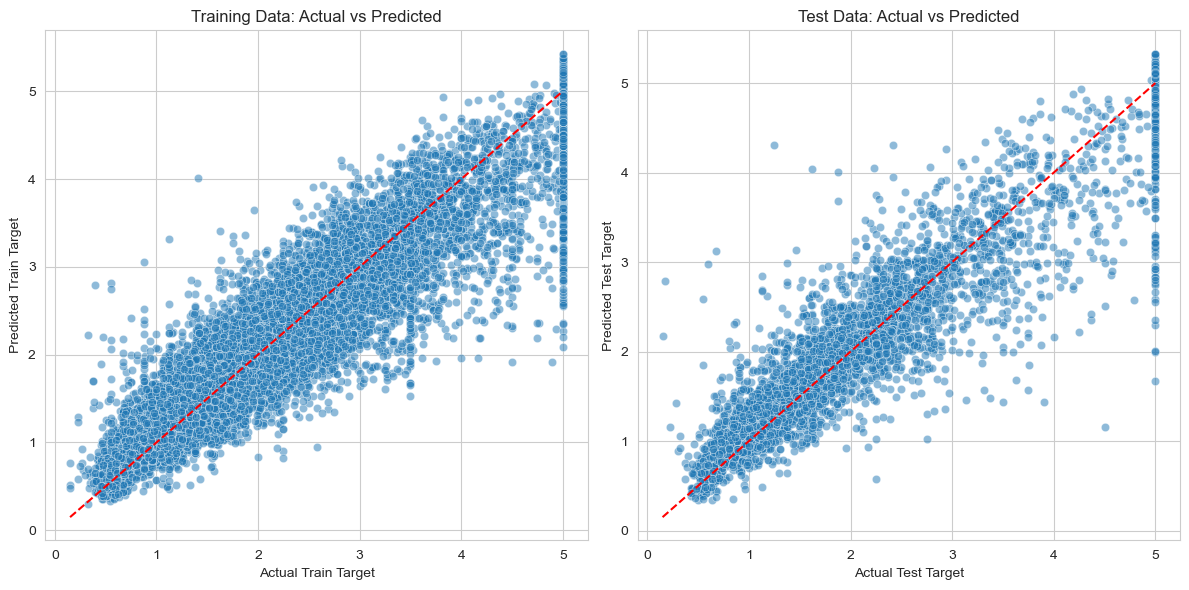

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the style
sns.set_style("whitegrid")

# Plotting actual vs predicted for training data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red')
plt.title('Training Data: Actual vs Predicted')
plt.xlabel('Actual Train Target')
plt.ylabel('Predicted Train Target')

# Plotting actual vs predicted for testing data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Actual Test Target')
plt.ylabel('Predicted Test Target')

plt.tight_layout()
plt.show()
